# Heart Disease Prediction By Jayant_kumar Mishra

### 1. About Data

##### age: The person's age in years
##### gender: The person's sex (1 = male, 0 = female)
##### cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain,    Value 4: asymptomatic)
##### trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
##### chol: The person's cholesterol measurement in mg/dl
##### fbs: The person's fasting blood sugar (&gt; 120 mg/dl, 1 = true; 0 = false)
##### restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
##### thalach: The person's maximum heart rate achieved
##### exang: Exercise induced angina (1 = yes; 0 = no)
##### ldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
##### slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
##### ca: The number of major vessels (0-3)
##### thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
##### target: Heart disease (0 = no, 1 = yes)

### 2. Problem Definition

###### a. Complete analysis of Heart Disease UCI dataset.
###### b. To predict whether a person has a heart disease or not based on the various biological and physical parameters.

### 3. import some package 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
## Logstic Regration.................
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
## Aba boost, Xg Boost...............
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
## Design Tree..................
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


In [5]:
## Random Forest ............## Utk
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [6]:
## Random Forest.
from sklearn.ensemble import RandomForestClassifier

### 4.Load the Data

In [7]:
os.chdir(r"C:\Users\Jayant kr. Mishra\Downloads")

In [3]:
os.listdir()

['@# ALL FiLE',
 'Corr.csv',
 'desktop.ini',
 'HeartDisease.csv',
 'KNN.ipynb',
 'linear and some other',
 'Logistic Regression using Python.rar',
 'Logistic Regression using Python_Class Assessment.pdf',
 'Mobile_data.csv',
 'Problem Statement_DecisionTree.pdf',
 'Problem Statement_RandomForest #taxiFare Data.pdf',
 'TaxiFare.csv',
 'train_profile.xlsx',
 'xAPI-Edu-Data.csv']

In [8]:
heart=pd.read_csv("HeartDisease.csv")

In [9]:
heart

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
#we have 303 column and 14 rows........
heart.shape

(303, 14)

### we have some float and int value 

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### print few column through head() and tail()

In [12]:
heart.head(7)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [13]:
heart.tail(8)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
## give the random value....
heart.sample(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1


### check the missing value

In [15]:
## not any null value present..
heart.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

### Describe the dataset....

In [16]:
heart.mean()

age                     54.366337
gender                   0.683168
chest_pain               0.966997
rest_bps               131.623762
cholestrol             246.264026
fasting_blood_sugar      0.148515
rest_ecg                 0.528053
thalach                149.646865
exer_angina              0.326733
old_peak                 1.039604
slope                    1.399340
ca                       0.729373
thalassemia              2.313531
target                   0.544554
dtype: float64

In [17]:
print(f"The most of the patients have a mean age of : {heart.age.mean()}")

The most of the patients have a mean age of : 54.366336633663366


In [18]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [19]:
## Not Present any high outliers..

In [20]:
heart.describe(percentiles=[0.01, 0.02, .03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,303.0,54.366337,9.082101,29.0,35.00,35.08,38.00,39.00,39.1,42.0,47.5,55.0,61.0,66.0,68.0,68.920,69.94,70.00,71.00,77.0
gender,303.0,0.683168,0.466011,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.00,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.000,3.00,3.00,3.00,3.0
rest_bps,303.0,131.623762,17.538143,94.0,100.00,101.04,104.06,105.08,108.0,110.0,120.0,130.0,140.0,152.0,160.0,169.600,170.00,177.84,180.00,200.0
cholestrol,303.0,246.264026,51.830751,126.0,149.00,160.16,167.06,172.16,175.0,188.0,211.0,240.0,274.5,308.8,326.9,334.600,340.94,353.96,406.74,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000,1.00,1.00,1.00,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.98,2.0
thalach,303.0,149.646865,22.905161,71.0,95.02,97.08,103.12,105.08,108.1,116.0,133.5,153.0,166.0,176.6,181.9,182.000,184.94,186.96,191.96,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000,1.00,1.00,1.00,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.8,1.6,2.8,3.4,3.592,3.60,4.00,4.20,6.2


### All Name of the columns... 

In [21]:
heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

### Our target variable

In [22]:
heart["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

### Here it is clear that our target is binary classification

In [23]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [24]:
heart["target"].unique()

array([1, 0], dtype=int64)

### Visualization

### Check the relationship between independent and dependent variable...

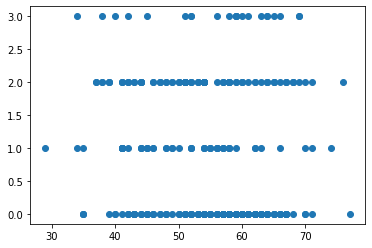

In [25]:
plt.scatter(heart["age"],heart["chest_pain"])

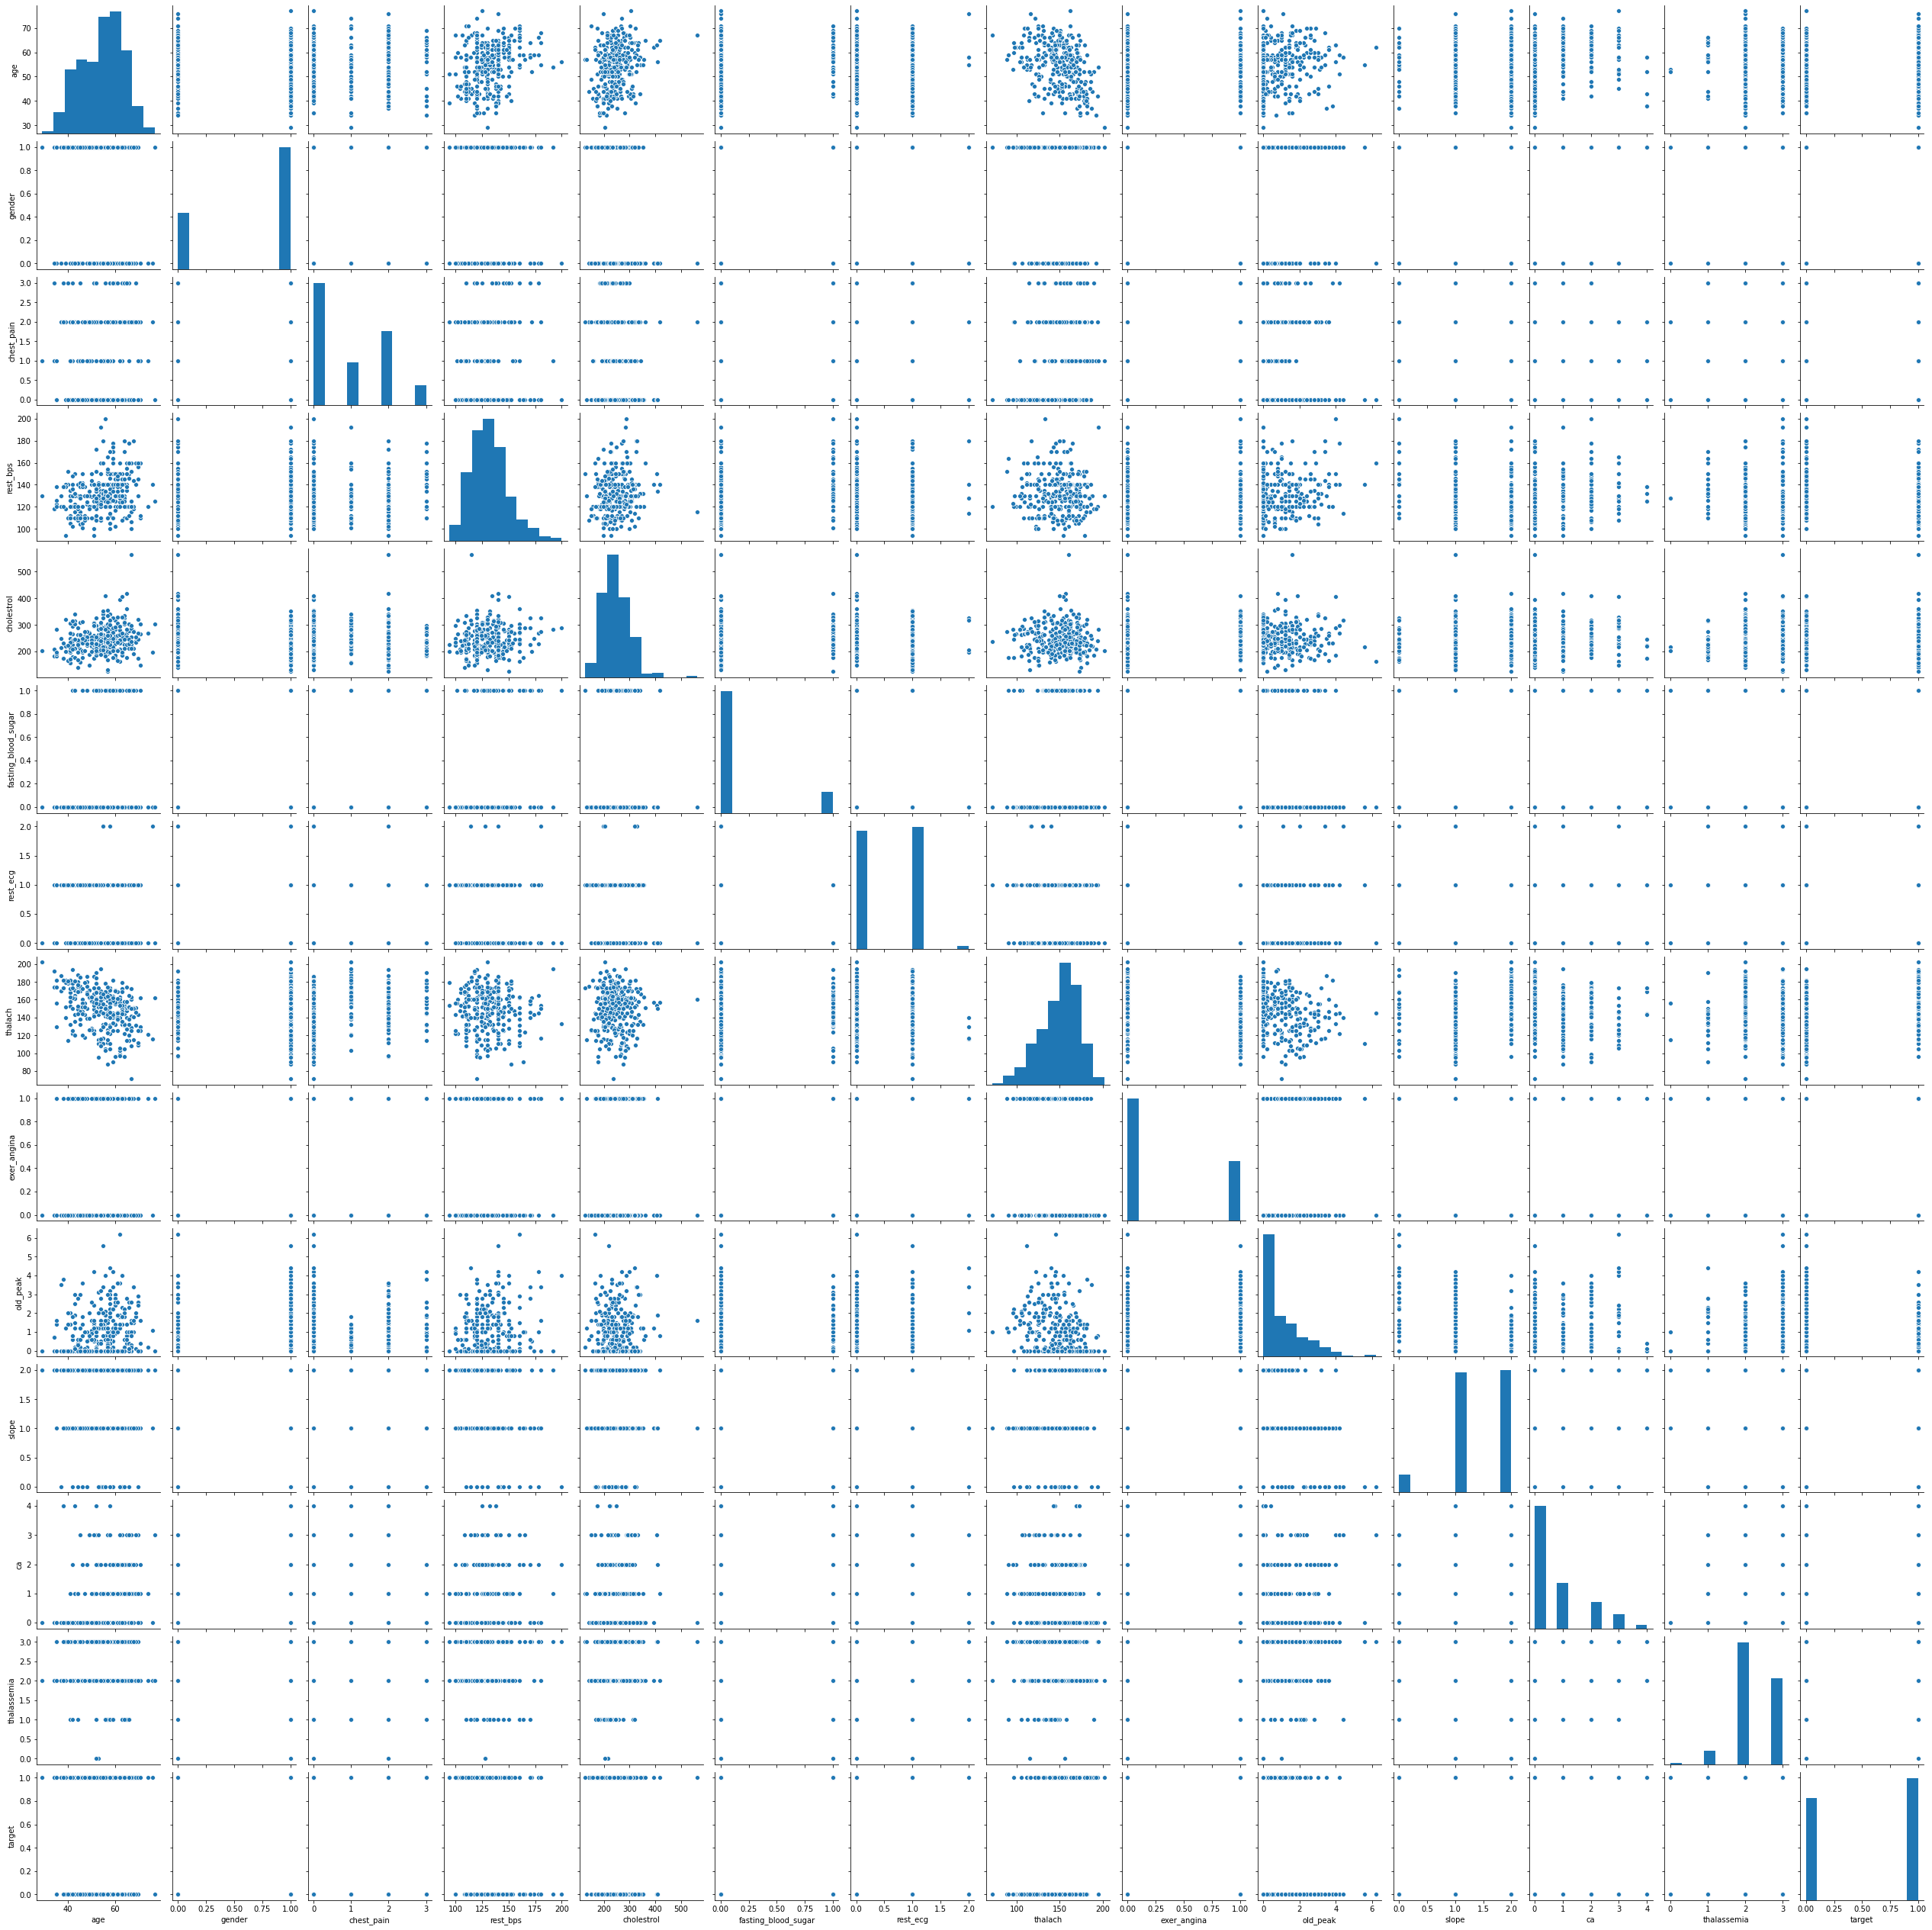

In [26]:
sns.pairplot(heart)

<AxesSubplot:>

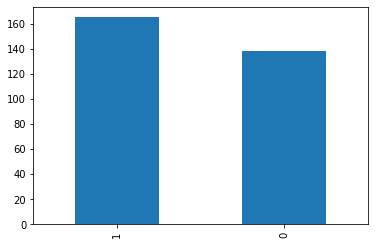

In [27]:
heart["target"].value_counts().plot(kind='bar')

1    165
0    138
Name: target, dtype: int64


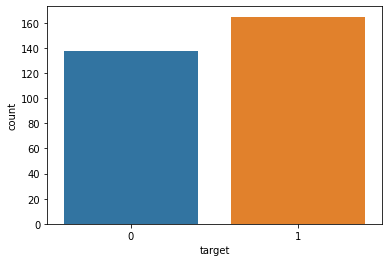

In [28]:
defs = heart["target"]

sns.countplot(defs)

## show the count
target_count = heart.target.value_counts()
print(target_count)

In [29]:
print("Percentage of patience with heart problems:",(165/303)*100)
print("Percentage of patience without heart problems:",(138/303)*100)

Percentage of patience with heart problems: 54.45544554455446
Percentage of patience without heart problems: 45.54455445544555


### We'll see the visual view of 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' , 'thalassemia'
 

### Analysing sex columns

In [30]:
heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [31]:
## show the count
heart["gender"].value_counts()
 

1    207
0     96
Name: gender, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

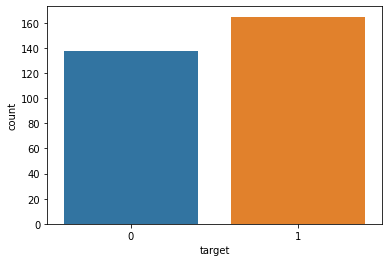

In [32]:
defs1 = heart["gender"]

sns.countplot(defs)

In [33]:
print("|| max_age :-",heart['age'].max(),"|| min_age :-",heart['age'].min(),"||")


|| max_age :- 77 || min_age :- 29 ||


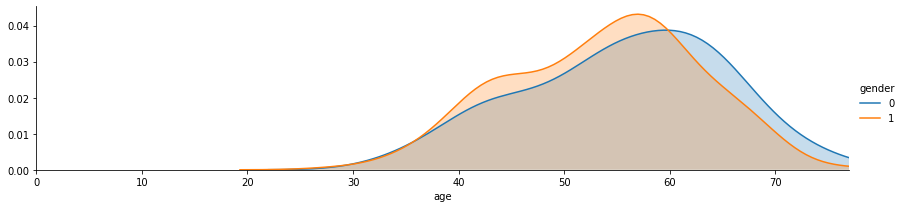

In [34]:
fig = sns.FacetGrid(heart, hue="gender", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = heart['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

#### Analysing the 'Chest Pain Type' feature

In [59]:
heart["chest_pain"].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

### As expected, the 'chest_pain' feature has values from 0 to 3

<AxesSubplot:>

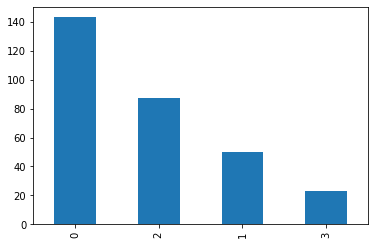

In [62]:
heart["chest_pain"].value_counts().plot(kind='bar')

In [58]:
heart["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

### Analysing the 'fasting_blood_sugar' feature

In [63]:
heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [64]:
heart["fasting_blood_sugar"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fasting_blood_sugar, dtype: float64

### it show (> 120 mg/dl, 1 = true; 0 = false)

In [65]:
heart["fasting_blood_sugar"].value_counts()

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

<AxesSubplot:>

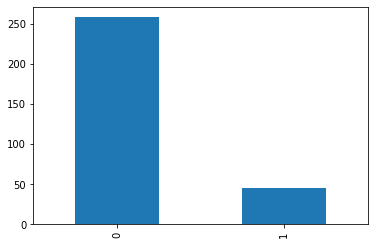

In [67]:
heart["fasting_blood_sugar"].value_counts().plot(kind='bar')

### Analysing the restecg feature

##### Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

In [68]:
heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [69]:
heart["rest_ecg"].value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

<AxesSubplot:>

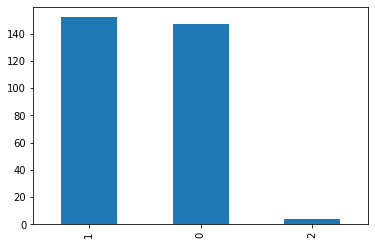

In [71]:
heart["rest_ecg"].value_counts().plot(kind='bar')

#### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### analysis the 'exer_angina'(Exercise induced angina (1 = yes; 0 = no))

In [72]:
heart['exer_angina'].value_counts()

0    204
1     99
Name: exer_angina, dtype: int64

<AxesSubplot:>

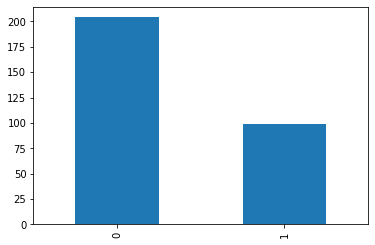

In [75]:
heart['exer_angina'].value_counts().plot(kind='bar')

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature(the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [76]:
heart['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [77]:
y2=heart['target']

<AxesSubplot:xlabel='slope', ylabel='target'>

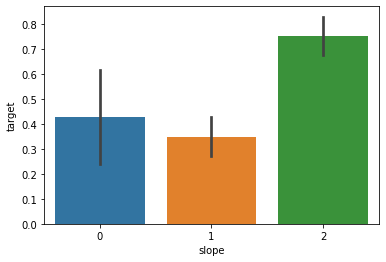

In [78]:
sns.barplot(heart["slope"],y2)


#### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature(The number of major vessels (0-3)

In [80]:
heart["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='target'>

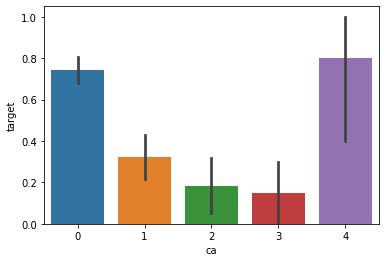

In [81]:
sns.barplot(heart["ca"],y2)


##### ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature(A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [83]:
heart["thalassemia"].value_counts()

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64

<AxesSubplot:>

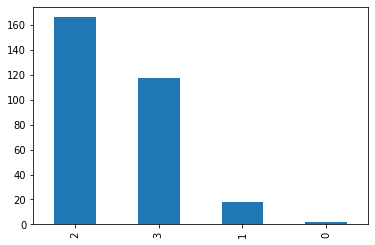

In [85]:
heart["thalassemia"].value_counts().plot(kind='bar')

### check correlation...........

In [89]:
corr=heart.corr()

In [90]:
corr

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
gender,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
chest_pain,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
rest_bps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
cholestrol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fasting_blood_sugar,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
rest_ecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exer_angina,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
old_peak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


<AxesSubplot:>

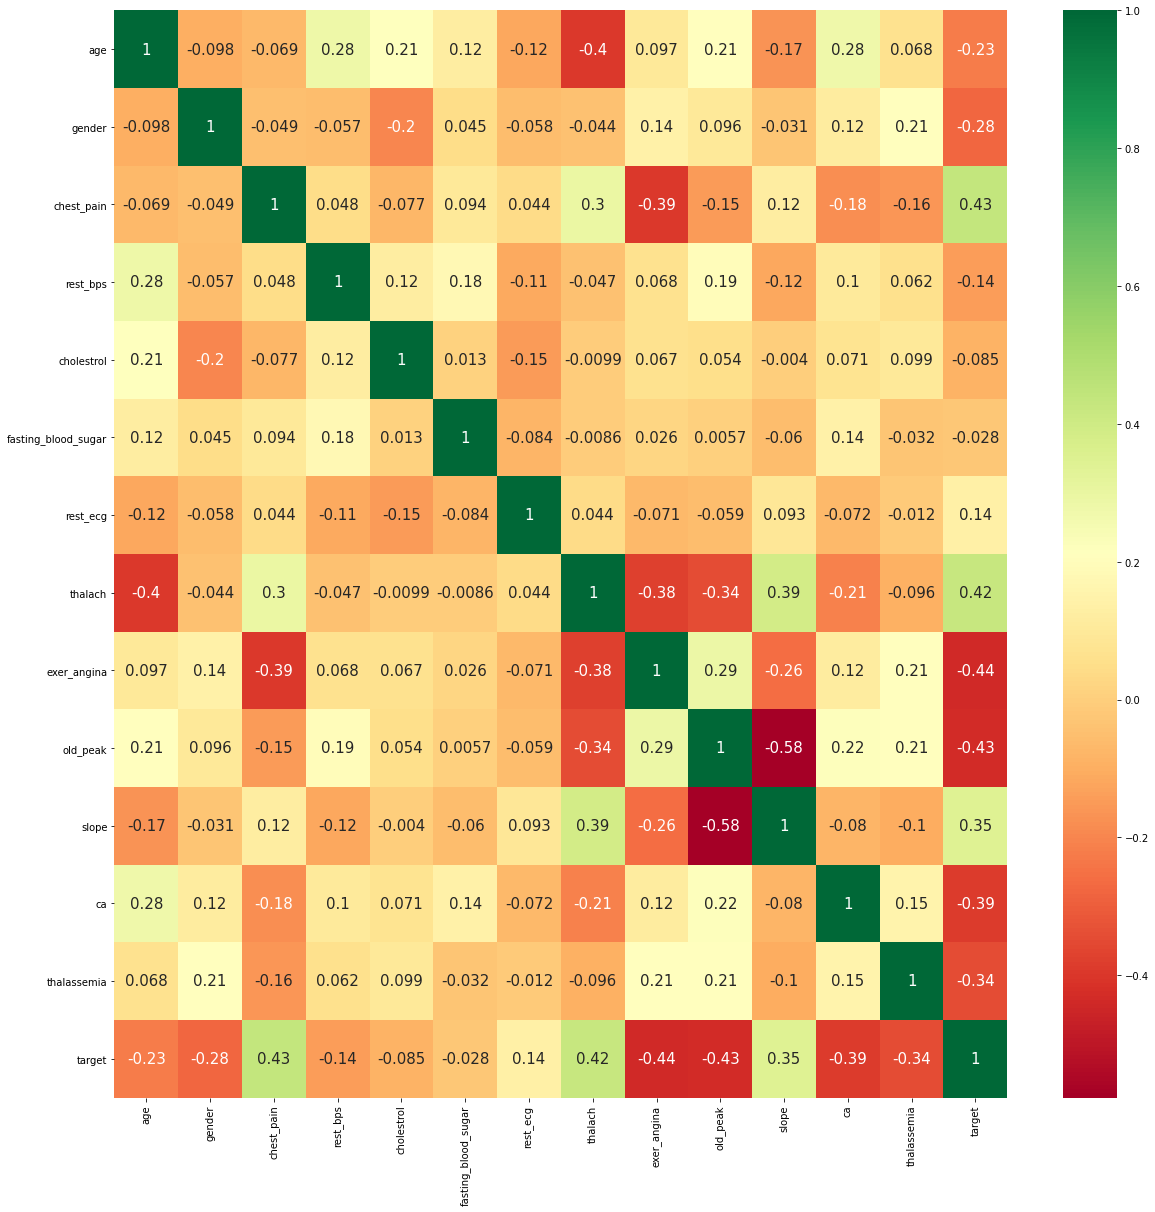

In [87]:
corr_matrix = heart.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(heart[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

### Not present any highly correlated value..

In [91]:
pd.set_option("precision",3)
corr.style.background_gradient(cmap="coolwarm")

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
gender,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
chest_pain,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
rest_bps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
cholestrol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fasting_blood_sugar,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
rest_ecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exer_angina,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
old_peak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


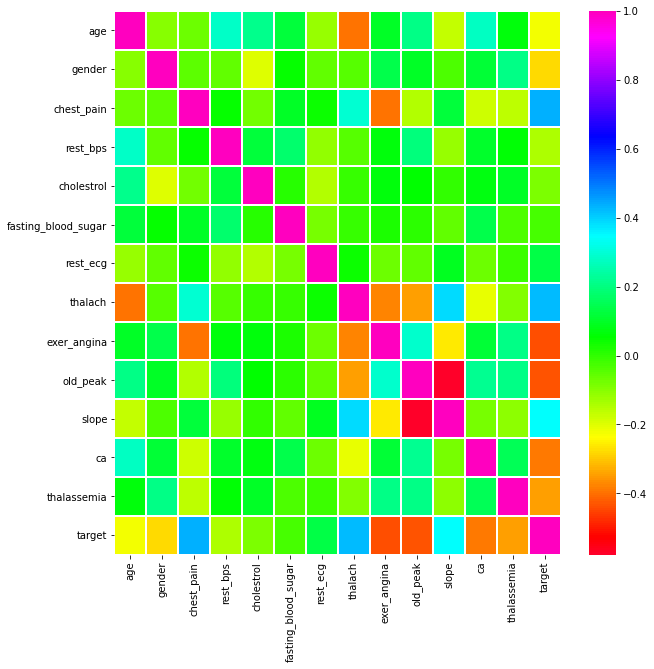

In [15]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,ax=ax,cmap="gist_rainbow", linewidths=0.1)
plt.show()

In [35]:
y=heart["target"]
X=heart.drop(["target"], axis=1)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)

In [40]:
print("|| X_train:-",X_train.shape,"|| X_test:-",X_test.shape,"|| y_train:-",y_train.shape,"|| y_test:-",y_test.shape,"||")

|| X_train:- (242, 13) || X_test:- (61, 13) || y_train:- (242,) || y_test:- (61,) ||


In [81]:
## Normalization
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

###### it will be on array form so we have to make a Dataframe..

In [82]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [83]:
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [84]:
X_train_scaled.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.527806,0.681818,0.337466,0.375485,0.275595,0.152893,0.256198,0.598480,0.314050,0.160824,0.704545,0.182851,0.768595
std,0.195111,0.466736,0.348191,0.171236,0.120443,0.360630,0.262573,0.176825,0.465098,0.185200,0.306398,0.254392,0.205247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.265306,0.194064,0.000000,0.000000,0.465649,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.552083,1.000000,0.333333,0.367347,0.262557,0.000000,0.250000,0.629771,0.000000,0.096774,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.469388,0.339612,0.000000,0.500000,0.717557,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model 1: Logstic Regression...........

### If accuracy of:
   ##### train>test=overfit
   ##### train<test=underfit
   ##### train~=test=generalised

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
log=LogisticRegression() # Object for model

In [42]:
model1=log.fit(X_train, y_train)  # Model training

C:\Users\Jayant kr. Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [181]:
# Evaluate
print("Accuracy of train", model1.score(X_train, y_train))
print("--------------------------------------------------------")
print("Accuracy of test", model1.score(X_test, y_test))  

Accuracy of train 0.8636363636363636
--------------------------------------------------------
Accuracy of test 0.8360655737704918


###### Class Prediction of train and test.......

In [44]:
pred_train=model1.predict(X_train) # It gives classes and prediction in (1,0) value 

In [49]:
pred_test=model1.predict(X_test) # It gives classes and prediction in (1,0) value 

In [47]:
pred_train

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [50]:
print("pred_train's shape",pred_train.shape,"pred_test's shape",pred_test.shape)

pred_train's shape (242,) pred_test's shape (61,)


## Model 2: Xg Boost...

#### standardization

###### we are try to bring all variables or features to a similar scale. standardization means centering the variables at zero. Z=(x-x_mean)/std

In [59]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()  # Turns into Z score 
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)             ##it will be on array form so we have to make DtaFrame......
X_train_std1=pd.DataFrame(X_train_std, columns=X_train.columns) ## This is the DataFrame......
X_test_std1=pd.DataFrame(X_test_std, columns=X_test.columns)

In [72]:
xgb1=XGBClassifier()
xgb1.fit(X_train_std1, y_train)

[22:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [182]:
print("Train Score :", xgb1.score(X_train_std1, y_train))
print("--------------------------------------------------------")
print("Test Score :", xgb1.score(X_test_std1, y_test))

Train Score : 1.0
--------------------------------------------------------
Test Score : 0.8032786885245902


## Model 3 : Adaboost

In [75]:
adb = AdaBoostClassifier()

In [76]:
model2 = adb.fit(X_train,y_train)

In [102]:
print("Train Score", model2.score(X_train_std1,y_train))
print("Test Score", model2.score(X_test_std1,y_test))

Train Score 0.6942148760330579
Test Score 0.6885245901639344


##### We Will do HyperParameter Tuning

In [ ]:
## n_estimators : int, optional (default=50)
     #The maximum number of estimators at which boosting is terminated.
     #In case of perfect fit, the learning procedure is stopped early.

In [106]:
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[50, 100,150, 200],  
       "learning_rate":[1, .1, .01, .001]}

adb2=AdaBoostClassifier()
adb_gs=GridSearchCV(adb2, param_grid=params, cv=10, n_jobs=2, verbose=1)
adb_gs.fit(X_train_std1, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:   25.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=2,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [107]:
adb_gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [183]:
adb1=AdaBoostClassifier(n_estimators=50, learning_rate=.1, random_state=88)
adb1.fit(X_train_std1, y_train)
print("Train Score ", adb1.score(X_train_std1, y_train))
print("--------------------------------------------------------")
print("Test Score",adb1.score(X_test_std1, y_test))

Train Score  0.8677685950413223
--------------------------------------------------------
Test Score 0.8524590163934426


## Model 4:Design Tree.....

In [ ]:
## Normalization run only onetime not multiple time..................
## you used std

In [ ]:
## Normalization
scale=MinMaxScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [53]:
dt1=DecisionTreeClassifier(random_state=88) ## WANT Same Value so we will used random_state..........
dt1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')

In [55]:
print("Train score :", dt1.score(X_train_scaled, y_train))## Every machine learning algorithm does overfit..............
print("Test score :", dt1.score(X_test_scaled, y_test))    ## by default it is using "gini" ..............

Train score : 1.0
Test score : 0.8360655737704918


#### We have Overfit Condition so we will make another tree model.............

##### We Will do HyperParameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[10,12,14,16,20,25]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=5, verbose=1, n_jobs=2) 
gsearch.fit(X_train, y_train)                                 

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 956 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 1920 out of 1920 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'criterion': ('gini', 'entropy'),
                      

In [60]:
gsearch.best_params_  ## our model tell us the best possible chances.............

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 16,
 'min_samples_split': 2}

##### Fit such parameters...

In [184]:
dt3=DecisionTreeClassifier(max_depth=3, criterion="entropy", 
                           min_samples_split=2,
                          min_samples_leaf=16)
dt3.fit(X_train, y_train)

print("Train accuracy:", dt3.score(X_train,y_train))
print("--------------------------------------------------------")
print("Test accuracy:", dt3.score(X_test,y_test))

Train accuracy: 0.8347107438016529
--------------------------------------------------------
Test accuracy: 0.7868852459016393


#### here we get the Generalised model..

In [63]:
dt3.feature_importances_ 

array([0.10684453, 0.05855764, 0.42007686, 0.        , 0.02731939,
       0.        , 0.        , 0.        , 0.04708286, 0.15104115,
       0.        , 0.18907756, 0.        ])

In [64]:
## In DataFrame
imp_feat=pd.DataFrame({"columns":X_train.columns, "imp":dt3.feature_importances_}).sort_values(by="imp", ascending=False)

In [65]:
imp_feat

,columns,imp
2,chest_pain,0.420077
11,ca,0.189078
9,old_peak,0.151041
0,age,0.106845
1,gender,0.058558
8,exer_angina,0.047083
4,cholestrol,0.027319
3,rest_bps,0.000000
5,fasting_blood_sugar,0.000000
6,rest_ecg,0.000000


### Model 5:- KNN

In [ ]:
#### by default n_neighbors =(default = 5)

In [109]:
#Standard Scaler
knn1=KNeighborsClassifier()
knn1.fit(X_train_scaled, y_train)
print("Train Score :", knn1.score(X_train_std1, y_train))
print("Test Score :", knn1.score(X_test_std1, y_test))

Train Score : 0.8512396694214877
Test Score : 0.8360655737704918


In [110]:
#Standard Scaler
k=[]
train_ac=[]
test_ac=[]
for i in range(3, 40, 2):   
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train_std1, y_train)
    ac1=knn2.score(X_train_std1, y_train)
    ac2=knn2.score(X_test_std1, y_test)
    k.append(i)
    train_ac.append(ac1)
    test_ac.append(ac2)
    print("Train accuracy {} and Test accuracy {} for k {}".format(ac1, ac2, i))
    

Train accuracy 0.8925619834710744 and Test accuracy 0.7868852459016393 for k 3
Train accuracy 0.8677685950413223 and Test accuracy 0.7704918032786885 for k 5
Train accuracy 0.8760330578512396 and Test accuracy 0.8360655737704918 for k 7
Train accuracy 0.8801652892561983 and Test accuracy 0.8032786885245902 for k 9
Train accuracy 0.8471074380165289 and Test accuracy 0.8032786885245902 for k 11
Train accuracy 0.8636363636363636 and Test accuracy 0.819672131147541 for k 13
Train accuracy 0.8553719008264463 and Test accuracy 0.819672131147541 for k 15
Train accuracy 0.8471074380165289 and Test accuracy 0.819672131147541 for k 17
Train accuracy 0.8347107438016529 and Test accuracy 0.819672131147541 for k 19
Train accuracy 0.8388429752066116 and Test accuracy 0.8360655737704918 for k 21
Train accuracy 0.8388429752066116 and Test accuracy 0.8524590163934426 for k 23
Train accuracy 0.8305785123966942 and Test accuracy 0.8524590163934426 for k 25
Train accuracy 0.8347107438016529 and Test accur

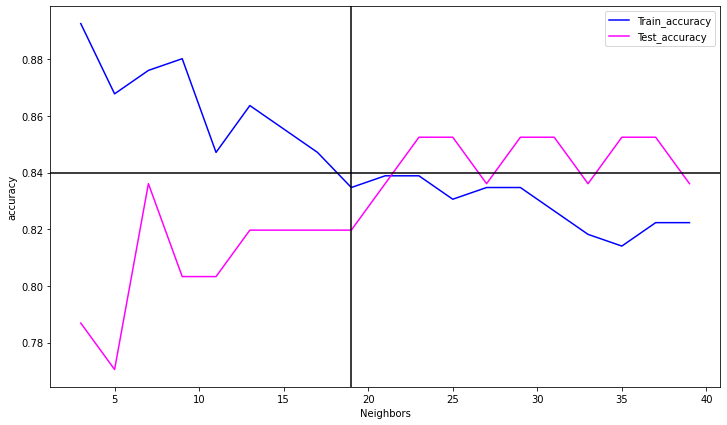

<Figure size 432x288 with 0 Axes>

In [112]:
plt.figure(figsize=(12,7))
plt.plot(k, train_ac, label="Train_accuracy", color="blue")
plt.plot(k, test_ac, label="Test_accuracy", color="magenta")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("accuracy")
plt.axvline(x = 19, color = 'black', label = 'axvline - full height')
plt.axhline(y = 0.84, color = 'black', label = 'axhline - full height')
plt.show()
plt.savefig("knn_standard.jpg")

In [173]:
### Put n_neighbors=13


In [185]:
knn2 =KNeighborsClassifier(n_neighbors=13)

model3 =knn2.fit(X_train_std1,y_train)

print("Train Score", model3.score(X_train_std1,y_train))
print("--------------------------------------------------------")
print("Test Score", model3.score(X_test_std1,y_test))

Train Score 0.8636363636363636
--------------------------------------------------------
Test Score 0.819672131147541


## Model 6:- RandomForest classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf1=RandomForestClassifier()

In [94]:
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train_scaled,y_train))
print("Test Accuracy :", rf1.score(X_test_scaled,y_test))

Train Accuracy : 0.71900826446281
Test Accuracy : 0.7049180327868853


##### Parameter Tunning

In [126]:
param = {"n_estimators":[20,50,55],"criterion":['gini'] ,"max_depth": [3,5,7,9,11],"min_samples_split":[2,4,6,8],
                "min_samples_leaf":[2,4,6,8]}

rf3 =RandomForestClassifier()
Grid_search = GridSearchCV(estimator = rf3, param_grid=param,cv=5,verbose=1,n_jobs=2)
Grid_search.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  54 tasks      | elapsed:    5.2s
[Parallel(n_jobs=2)]: Done 354 tasks      | elapsed:   20.1s
[Parallel(n_jobs=2)]: Done 854 tasks      | elapsed:   48.9s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [127]:
Grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

##### Fit the best Parameter............

In [186]:
rf2=RandomForestClassifier(max_depth=10, criterion="gini", 
                           min_samples_split=8,
                          min_samples_leaf=4,n_estimators=50)
rf2.fit(X_train_scaled, y_train)
print("Train Accuracy :", rf2.score(X_train_scaled,y_train))
print("--------------------------------------------------------")
print("Test Accuracy :", rf2.score(X_test_scaled,y_test))

Train Accuracy : 0.9297520661157025
--------------------------------------------------------
Test Accuracy : 0.8688524590163934


## Final score that which model is best.. 

In [187]:
df5 = pd.DataFrame({"Model":["LogsticRegration","Xgboost","Adaboost","KNN","RandomForest","DesignTree"],
            "Train_Score":[model1.score(X_train, y_train),xgb1.score(X_train_std1, y_train),adb1.score(X_train_std1, y_train),model3.score(X_train_std1,y_train),rf2.score(X_train_scaled,y_train),dt3.score(X_train,y_train)],
            "Test_Score":[model1.score(X_test, y_test),xgb1.score(X_test_std1, y_test),adb1.score(X_test_std1, y_test),model3.score(X_test_std1,y_test),rf2.score(X_test_scaled,y_test),dt3.score(X_test,y_test)]})

In [188]:
df5

,Model,Train_Score,Test_Score
0,LogsticRegration,0.863636,0.836066
1,Xgboost,1.000000,0.803279
2,Adaboost,0.867769,0.852459
3,KNN,0.863636,0.819672
4,RandomForest,0.929752,0.868852
5,DesignTree,0.834711,0.786885


In [176]:
Multiple_model = df5.set_index('Model')

In [177]:
Multiple_model

,Train_Score,Test_Score
Model,,
LogsticRegration,0.863636,0.836066
Xgboost,1.000000,0.803279
Adaboost,0.867769,0.852459
KNN,0.863636,0.819672
RandomForest,0.929752,0.836066
DesignTree,0.834711,0.803279


In [189]:
Multiple_model.to_excel("accuracy_of_HeartDeseasePrediction.xlsx")

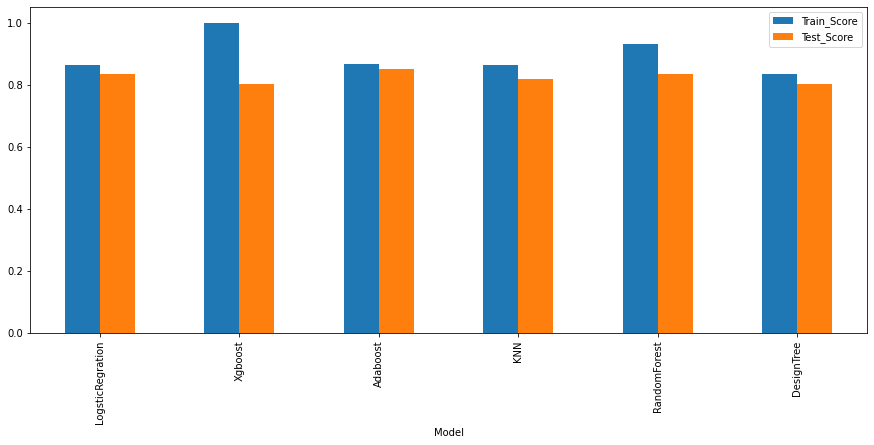

In [190]:
Multiple_model.plot(figsize=(15,6),kind='bar')
plt.savefig("multiple_model_accuracy.jpg")

### Here we can see that Adaboost Model give the batter Result ie.Adaboost	for train=0.867769 and Test=0.852459